In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#Reading the dataset
data=pd.read_csv('/content/movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
#Shape of the dataset
data.shape

(5043, 28)

In [5]:
#Information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
#Total null values present in each column
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
# Drop null values
data=data.dropna()

In [8]:
#Find the duplicates

data.duplicated().sum()

33

In [9]:
#Shape of the dataset
data.shape

(3756, 28)

In [10]:
# coverting datatype of title_year and gross column

data["title_year"] = data["title_year"].astype(int)
data["gross"] = data["gross"].astype(int)

<ipython-input-10-a9d0c05d0667>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["title_year"] = data["title_year"].astype(int)
<ipython-input-10-a9d0c05d0667>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gross"] = data["gross"].astype(int)


In [11]:
#Check data
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012,632.0,6.6,2.35,24000


In [12]:
#List of variables in the datset
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [13]:
#Stats for numeric columns in a table
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,3756.0,1.673783e+02,1.234520e+02,2.00,77.00,138.50,224.00,8.130000e+02
duration,3756.0,1.102580e+02,2.264672e+01,37.00,96.00,106.00,120.00,3.300000e+02
director_facebook_likes,3756.0,8.073365e+02,3.068172e+03,0.00,11.00,64.00,235.00,2.300000e+04
actor_3_facebook_likes,3756.0,7.712796e+02,1.894250e+03,0.00,194.00,436.00,691.00,2.300000e+04
actor_1_facebook_likes,3756.0,7.751339e+03,1.551934e+04,0.00,745.00,1000.00,13000.00,6.400000e+05
gross,3756.0,5.261282e+07,7.031787e+07,162.00,8270232.75,30093107.00,66881940.75,7.605058e+08
num_voted_users,3756.0,1.058267e+05,1.520354e+05,91.00,19667.00,53973.50,128602.00,1.689764e+06
cast_total_facebook_likes,3756.0,1.152710e+04,1.912218e+04,0.00,1919.75,4059.50,16240.00,6.567300e+05
facenumber_in_poster,3756.0,1.377263e+00,2.041541e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,3756.0,3.368432e+02,4.112274e+02,4.00,110.00,210.00,398.25,5.060000e+03


In [14]:
 #Count of languages
data.groupby('language')['language'].count()    

language
Aboriginal       2
Arabic           1
Aramaic          1
Bosnian          1
Cantonese        7
Czech            1
Danish           3
Dari             2
Dutch            3
English       3598
Filipino         1
French          34
German          10
Hebrew           1
Hindi            5
Hungarian        1
Indonesian       2
Italian          7
Japanese        10
Kazakh           1
Korean           5
Mandarin        15
Maya             1
Mongolian        1
None             1
Norwegian        4
Persian          3
Portuguese       5
Romanian         1
Russian          1
Spanish         23
Thai             3
Vietnamese       1
Zulu             1
Name: language, dtype: int64

In [15]:
#Check distribution
data.groupby('country')['country'].count()        

country
Afghanistan          1
Argentina            3
Aruba                1
Australia           39
Belgium              1
Brazil               5
Canada              59
Chile                1
China               13
Colombia             1
Czech Republic       3
Denmark              8
Finland              1
France             101
Georgia              1
Germany             80
Greece               1
Hong Kong           13
Hungary              2
Iceland              1
India                5
Indonesia            1
Iran                 4
Ireland              7
Israel               1
Italy               11
Japan               15
Mexico               6
Netherlands          3
New Line             1
New Zealand         11
Norway               4
Official site        1
Peru                 1
Poland               1
Romania              2
Russia               3
South Africa         3
South Korea          8
Spain               21
Taiwan               2
Thailand             4
UK                 318
USA

In [16]:
# Correlation between columns
data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465


# Visualization

array([[<Axes: title={'center': 'num_critic_for_reviews'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'director_facebook_likes'}>,
        <Axes: title={'center': 'actor_3_facebook_likes'}>],
       [<Axes: title={'center': 'actor_1_facebook_likes'}>,
        <Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'num_voted_users'}>,
        <Axes: title={'center': 'cast_total_facebook_likes'}>],
       [<Axes: title={'center': 'facenumber_in_poster'}>,
        <Axes: title={'center': 'num_user_for_reviews'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'title_year'}>],
       [<Axes: title={'center': 'actor_2_facebook_likes'}>,
        <Axes: title={'center': 'imdb_score'}>,
        <Axes: title={'center': 'aspect_ratio'}>,
        <Axes: title={'center': 'movie_facebook_likes'}>]], dtype=object)

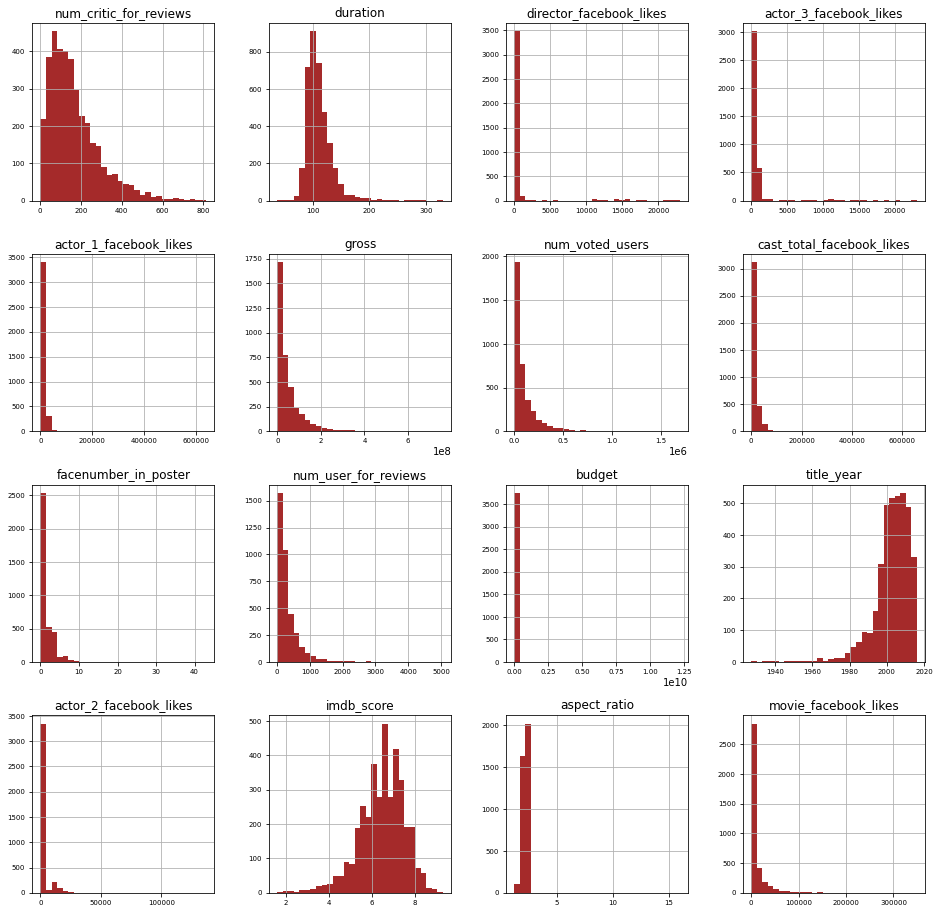

In [17]:
data.hist(bins=30,figsize=(16,16),color='Brown',xlabelsize=7, ylabelsize=7)

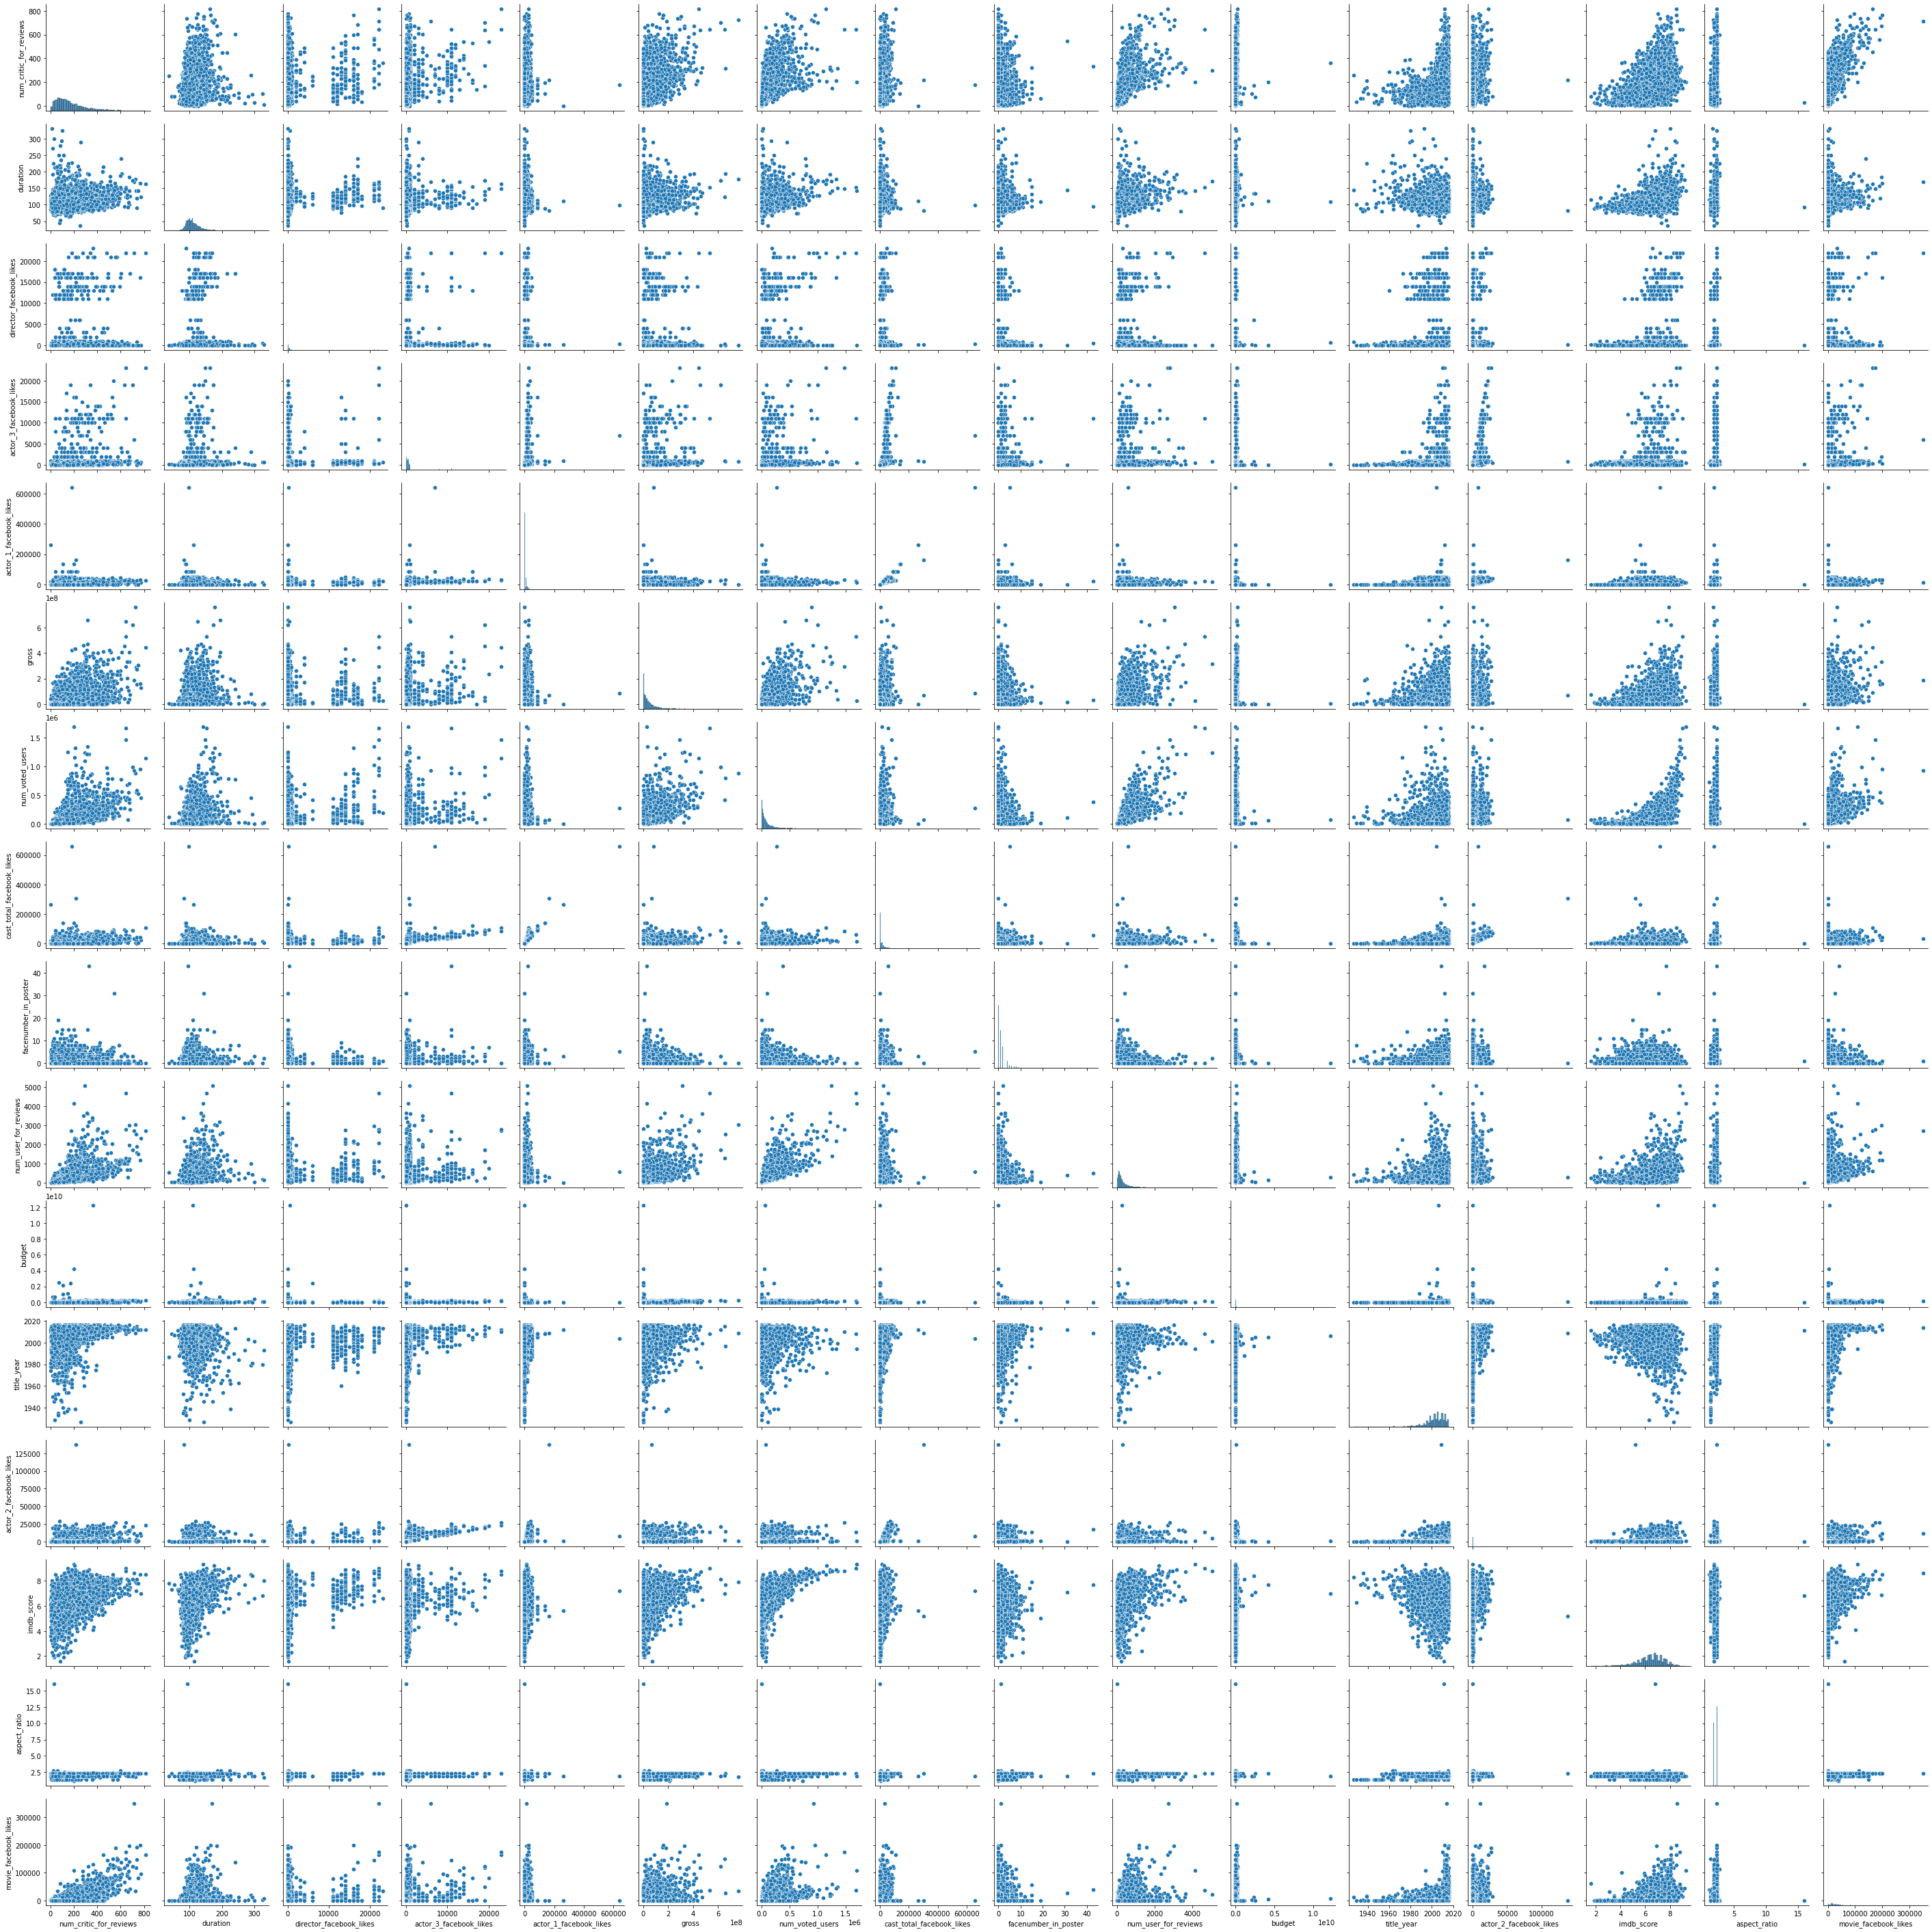

In [18]:

sns.pairplot(data)

##2.5 Correlation

To find out whether there is any relation between variables, in other terms multicollineariaty.


<Axes: >

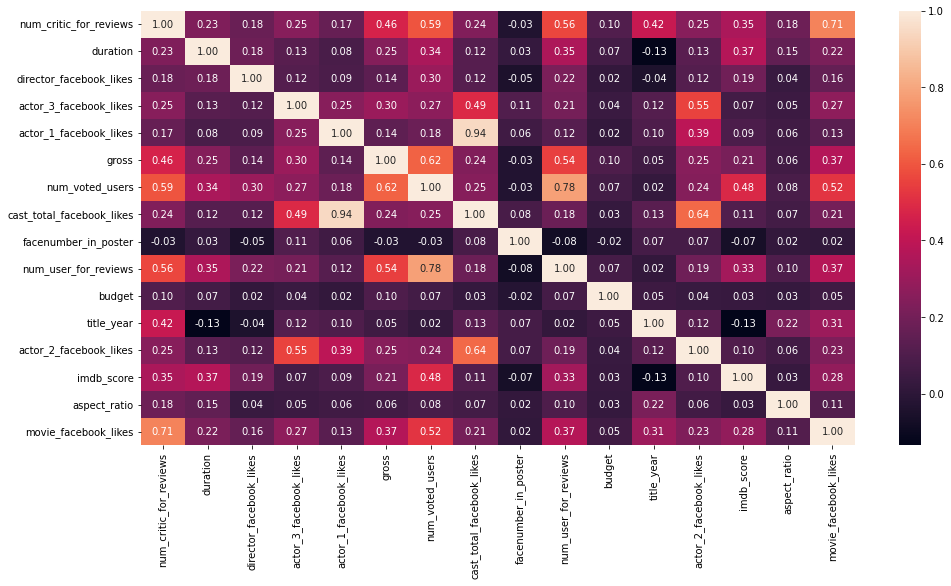

In [19]:
plt.subplots(figsize=(16,8))
sns.heatmap(data.corr(), annot = True, fmt='.2f')

<Axes: >

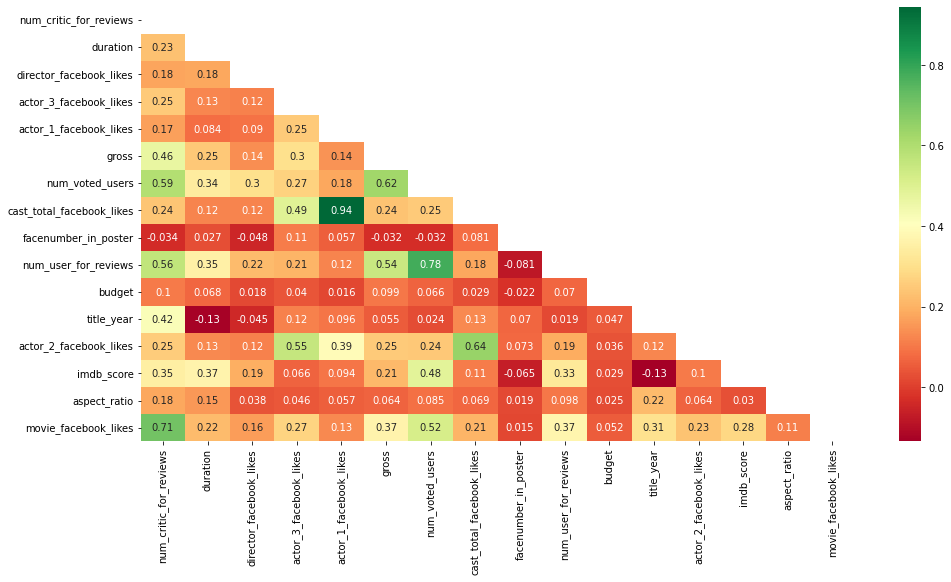

In [20]:
#Finding Correlation between variables
corr = data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(16,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [22]:
data['genres'].value_counts()

Comedy|Drama|Romance                     147
Drama                                    141
Comedy|Drama                             138
Comedy                                   138
Comedy|Romance                           131
                                        ... 
Action|Drama|Fantasy|Horror|Thriller       1
Action|Thriller|Western                    1
Action|Adventure|Drama|Family              1
Animation|Comedy|Family|Music|Romance      1
Comedy|Crime|Horror                        1
Name: genres, Length: 745, dtype: int64

##IMDB Rating Distribution

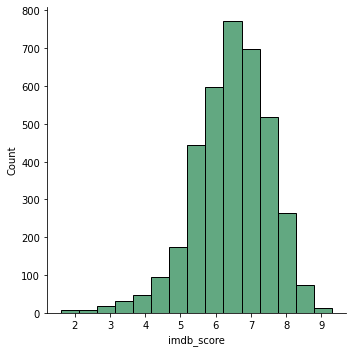

In [23]:
sns.displot(data["imdb_score"],bins = 15, color = "seagreen")

<ipython-input-24-e6f29f7506e8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(data['imdb_score'],bins=30)


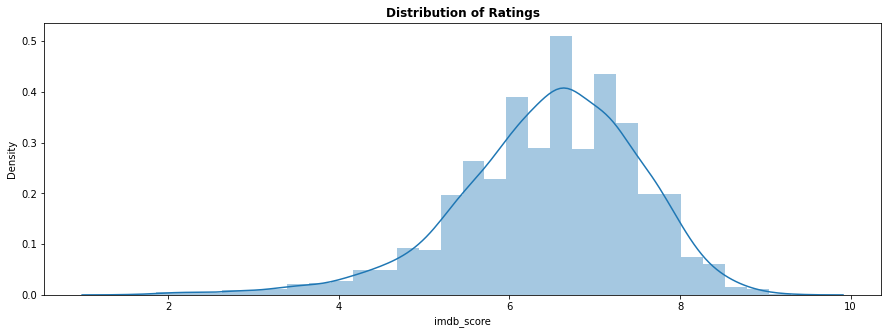

In [24]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.distplot(data['imdb_score'],bins=30)
g.set_title("Distribution of Ratings", weight = "bold")
plt.show()

<Axes: >

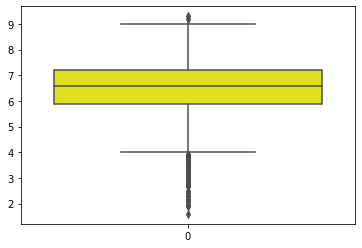

In [25]:
sns.boxplot(data["imdb_score"], color = "yellow")

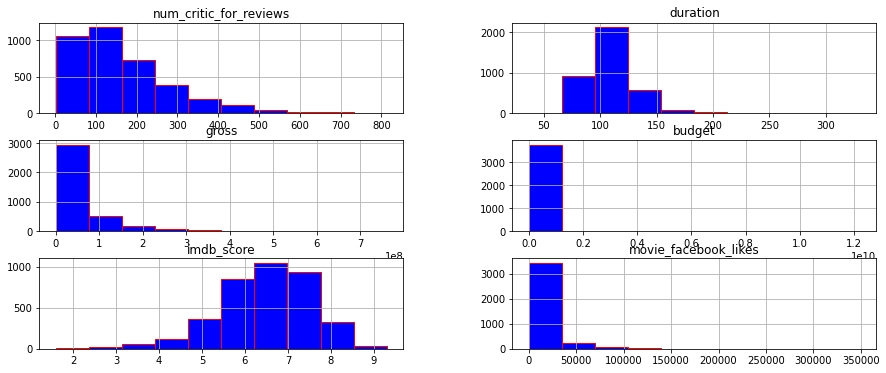

In [26]:
numerical_attributes = ['num_critic_for_reviews', 'duration', 'gross', 'budget','imdb_score','movie_facebook_likes']
data[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (3, 2));

### Color of movies

([<matplotlib.patches.Wedge at 0x7f94f6d0aa30>,
 [Text(-1.094088949547079, 0.11388314396331689, 'Color'),
  Text(1.2930142225519508, -0.13458907934291986, 'B/W')])

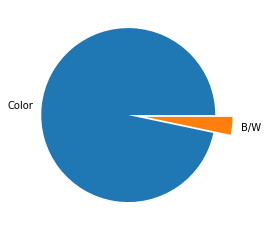

In [27]:
c = data['color'].value_counts()
names = ['Color', 'B/W']
plt.pie(c, labels=names, explode=[0.0,0.2])

###Top voted movies

In [28]:
top_voted = data.sort_values(['num_voted_users'], ascending = False)

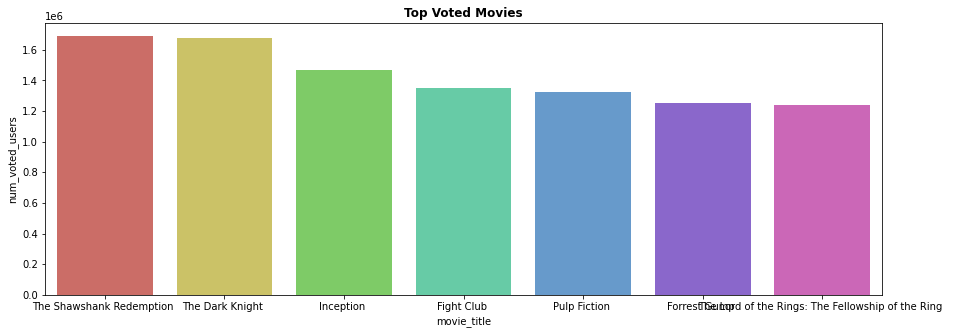

In [29]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['movie_title'][:7],y=top_voted['num_voted_users'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

###Top voted movies ratings

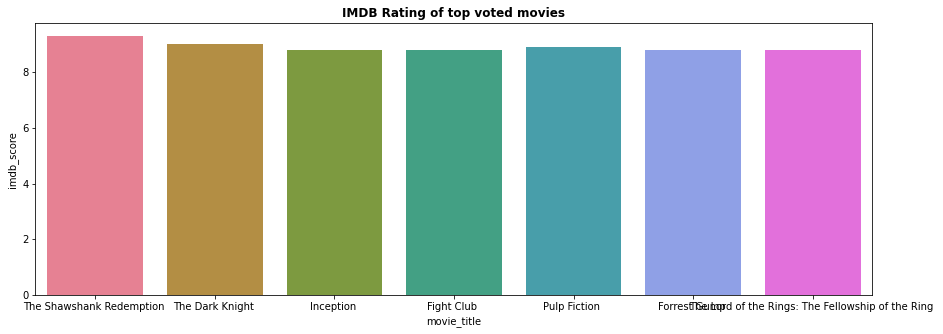

In [30]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['movie_title'][:7],y=top_voted['imdb_score'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

###Gross of top rated movies

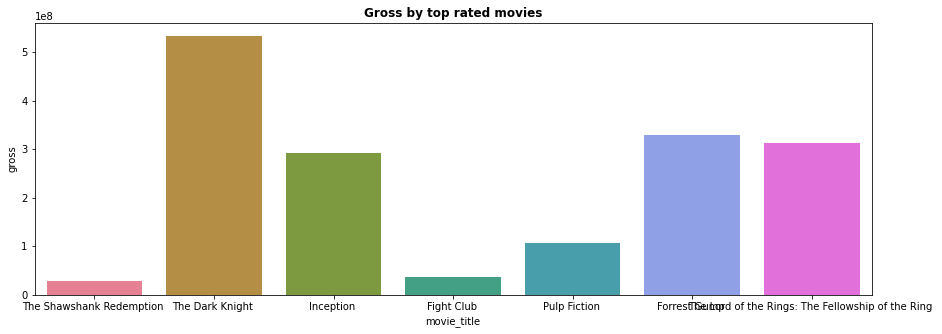

In [31]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['movie_title'][:7],y=top_voted['gross'][:7], palette = 'husl')
g.set_title("Gross by top rated movies", weight = "bold")
plt.show()

###Top movies by Gross

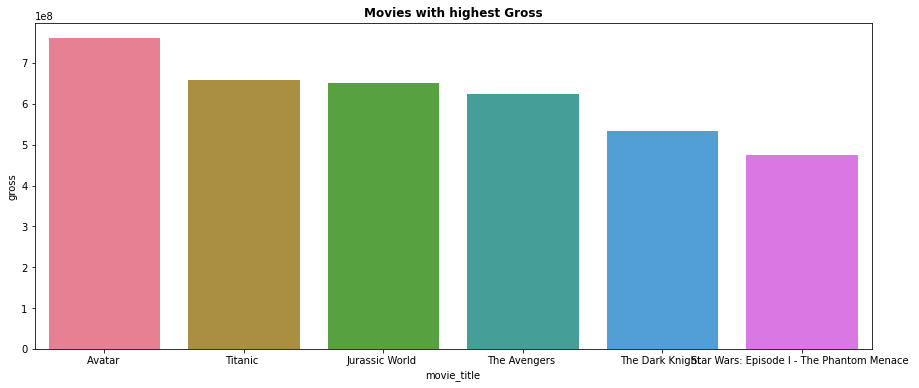

In [32]:
highest_earning = data.sort_values(['gross'], ascending = False)
fig,axs=plt.subplots(figsize=(15,6))
g=sns.barplot(x=highest_earning['movie_title'][:7],y=highest_earning['gross'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()

###Maximum movies released in-(year)

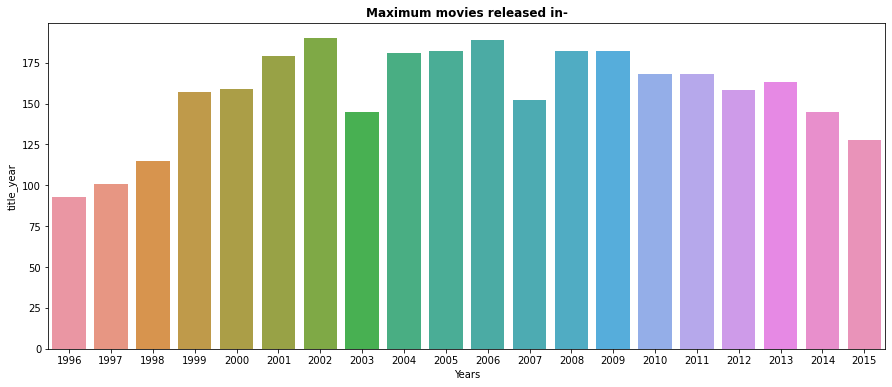

In [33]:
fig,axs=plt.subplots(figsize=(15,6))
g=sns.barplot(x=data['title_year'].value_counts()[:20].index,y=data['title_year'].value_counts()[:20])
g.set_title("Maximum movies released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()

###Mostly occurred Directors

In [34]:
top_directors = data["director_name"].value_counts()
top_directors.head(10)



Steven Spielberg     25
Clint Eastwood       19
Woody Allen          19
Ridley Scott         17
Martin Scorsese      16
Steven Soderbergh    16
Tim Burton           16
Spike Lee            15
Renny Harlin         15
Ron Howard           13
Name: director_name, dtype: int64

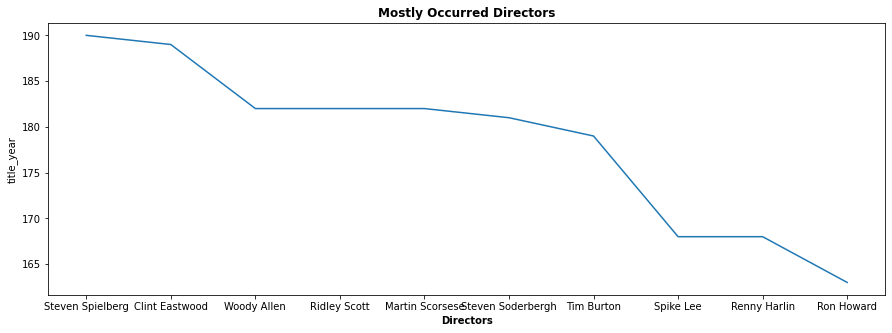

In [35]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.lineplot(x=data['director_name'].value_counts()[:10].index,y=data['title_year'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

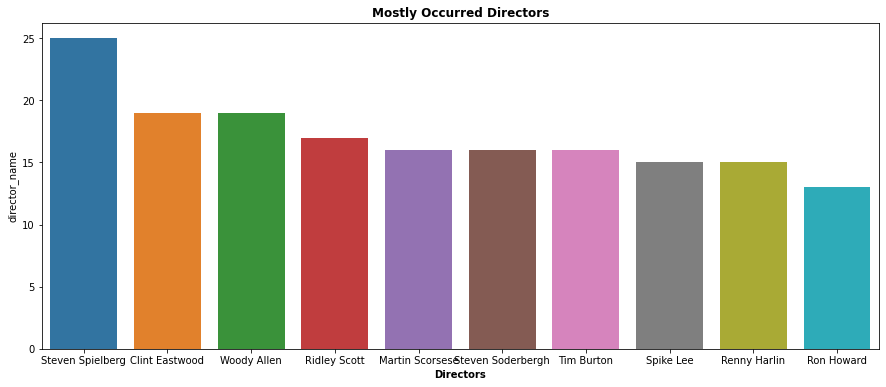

In [36]:
fig,axs=plt.subplots(figsize=(15,6))
g=sns.barplot(x=data['director_name'].value_counts()[:10].index,y=data['director_name'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

###Directors with respect to Gross of the movies

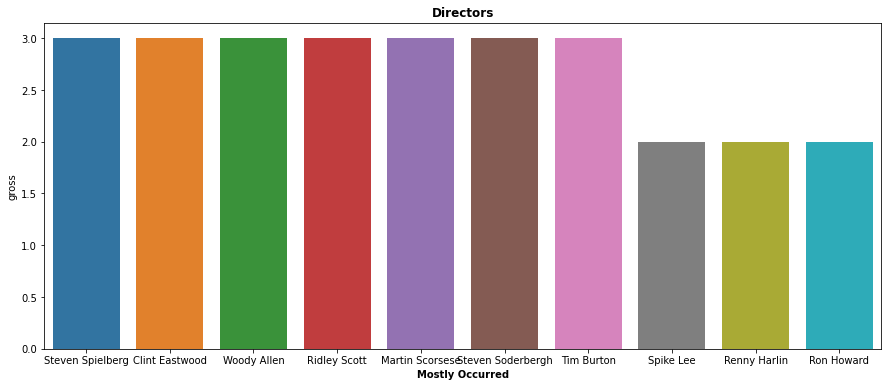

In [37]:
fig,axs=plt.subplots(figsize=(15,6))
g=sns.barplot(x=data['director_name'].value_counts()[:10].index,y=data['gross'].value_counts()[:10])
g.set_title("Directors", weight = "bold")
g.set_xlabel("Mostly Occurred", weight = "bold")
plt.show()

### Runtime of movie

Text(0.5, 1.0, 'Time Duration of movies')

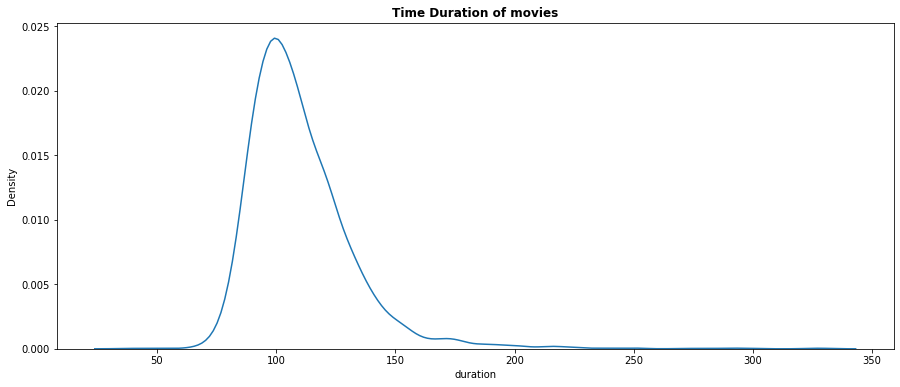

In [38]:
fig,axs=plt.subplots(figsize=(15,6))
g=sns.kdeplot(data['duration'])
g.set_title("Time Duration of movies", weight = "bold")

###Stars with most Occurences in movies

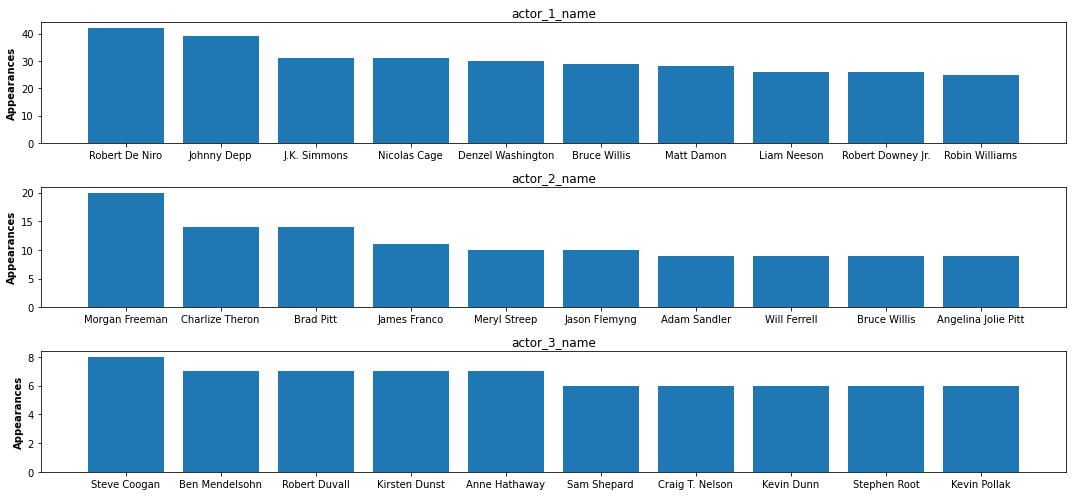

In [39]:
stars=['actor_1_name','actor_2_name','actor_3_name']
fig,axs=plt.subplots(3,1,figsize=(15,7))
ax=0
for x in stars:
    axs[ax].bar(data[x].value_counts()[:10].index,data[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

###Appearances of Stars in Top voted movies

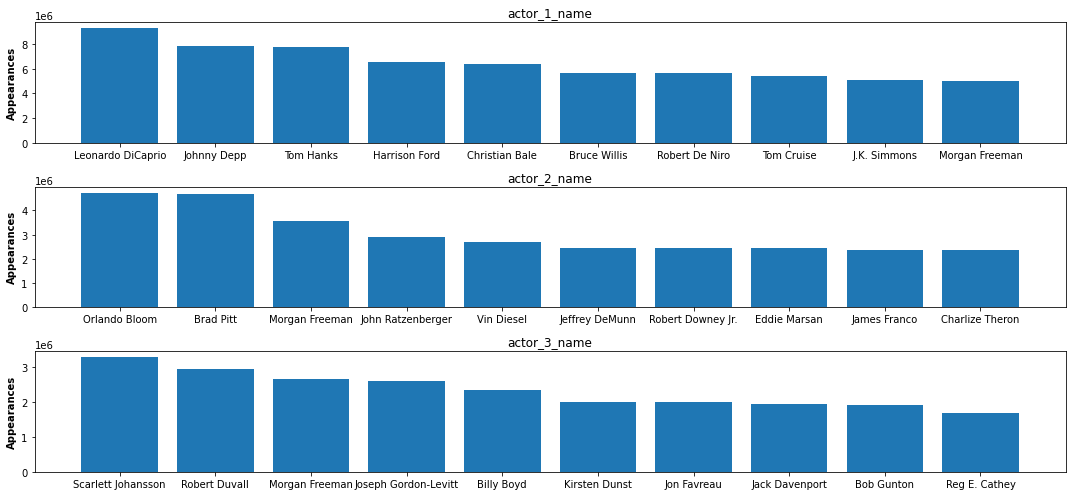

In [40]:
stars=['actor_1_name','actor_2_name','actor_3_name']
fig,axs=plt.subplots(3,1,figsize=(15,7))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['num_voted_users'],ascending=False)[:10]
    axs[ax].bar(d[x],d['num_voted_users'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

###Top 10 Genres

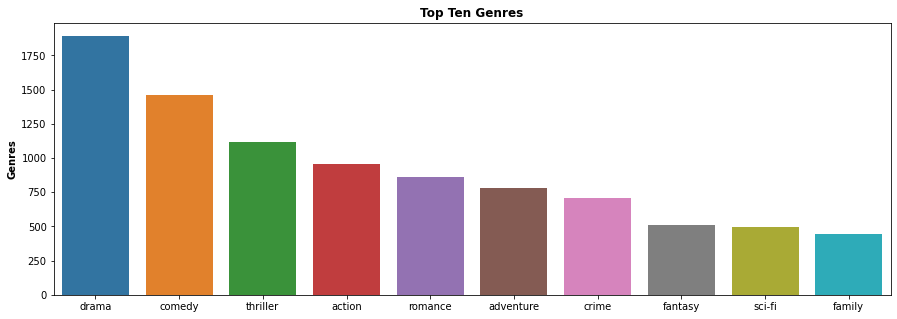

In [41]:
from collections import Counter
genre=[]
for x in data['genres']:
    for y in x.split('|'):
        genre.append(y.strip().lower())

count=Counter(genre)
count=count.most_common()[:10]
a,b=map(list,zip(*count))

fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(y=b,x=a)
g.set_ylabel("Genres", weight = "bold")
g.set_title("Top Ten Genres", weight = "bold")
plt.show()

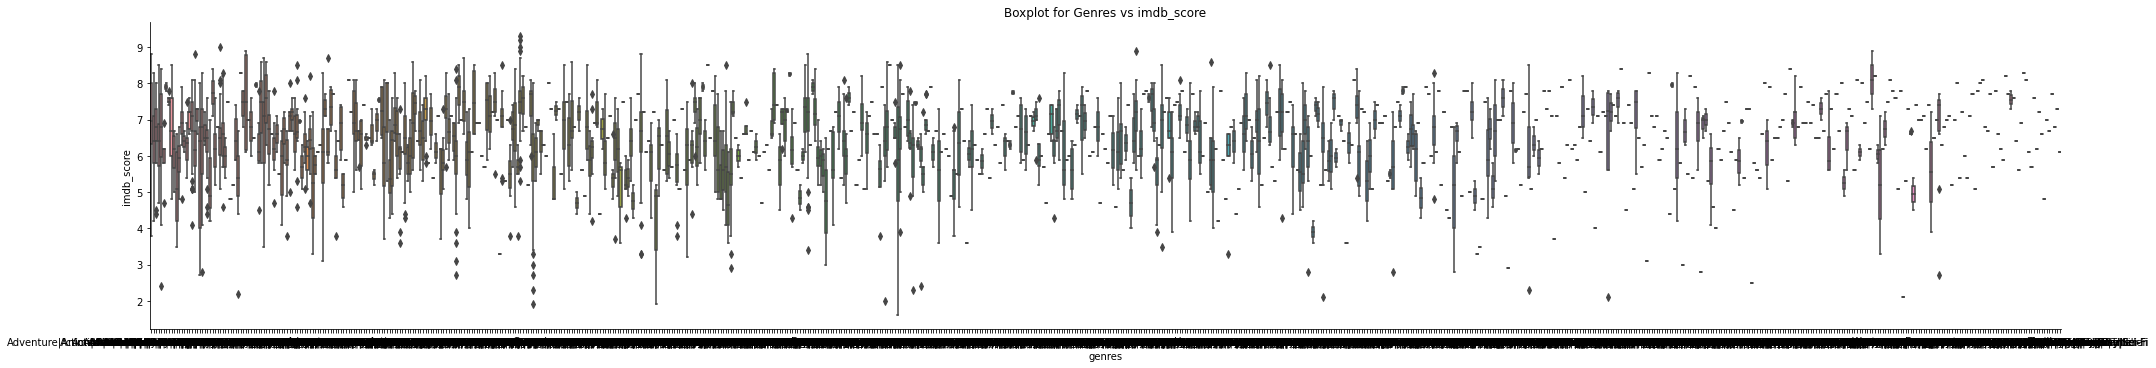

In [42]:
sns.catplot(x="genres", y="imdb_score", data=data, kind="box", aspect=6)
plt.title("Boxplot for Genres vs imdb_score")
plt.show()

In [43]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_2_name', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

##Content Rating

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'G'),
  Text(3, 0, 'R'),
  Text(4, 0, 'Approved'),
  Text(5, 0, 'NC-17'),
  Text(6, 0, 'X'),
  Text(7, 0, 'Not Rated'),
  Text(8, 0, 'Unrated'),
  Text(9, 0, 'M'),
  Text(10, 0, 'GP'),
  Text(11, 0, 'Passed')])

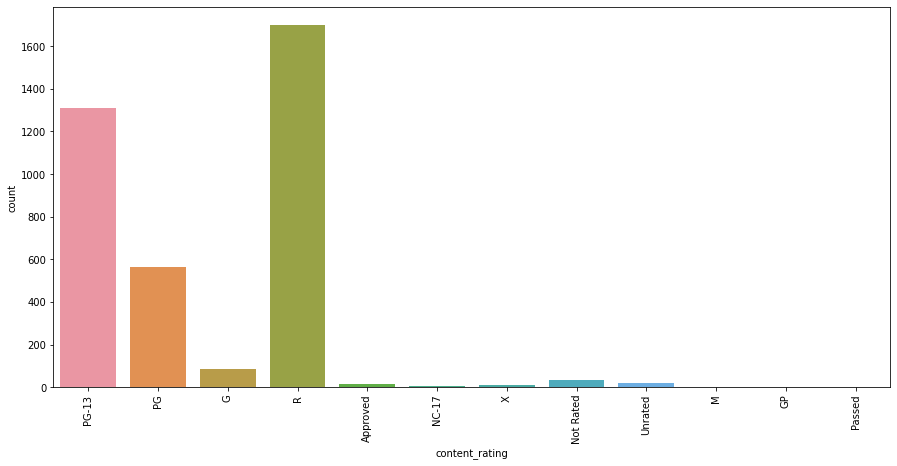

In [44]:
plt.figure(figsize=(15, 7))
plot = sns.countplot(x='content_rating', data=data)
plt.xticks(rotation = 90)